In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Nissan = yf.download("NSANY", start="2010-01-01", end="2023-01-01")
Nissan

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.650000,17.950001,17.650000,17.889999,17.588587,69800
2010-01-05,17.600000,17.700001,17.450001,17.600000,17.303473,75500
2010-01-06,17.440001,17.490000,17.309999,17.309999,17.018358,82400
2010-01-07,17.100000,17.200001,16.950001,17.160000,16.870886,60500
2010-01-08,17.299999,17.549999,17.250000,17.549999,17.254314,101500
...,...,...,...,...,...,...
2022-12-23,6.150000,6.250000,6.150000,6.250000,6.250000,110800
2022-12-27,6.340000,6.470000,6.200000,6.220000,6.220000,165500
2022-12-28,6.160000,6.260000,6.160000,6.190000,6.190000,127100


In [9]:
Nissan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [11]:
Nissan.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
#Note the : before the column name states to get all available items. If these was not there this will return a Error on the column name as an Error
close = Nissan.loc[:,"Close"].copy()
close

Date
2010-01-04    17.889999
2010-01-05    17.600000
2010-01-06    17.309999
2010-01-07    17.160000
2010-01-08    17.549999
                ...    
2022-12-23     6.250000
2022-12-27     6.220000
2022-12-28     6.190000
2022-12-29     6.280000
2022-12-30     6.280000
Name: Close, Length: 3272, dtype: float64

In [26]:
plt.style.use("seaborn")

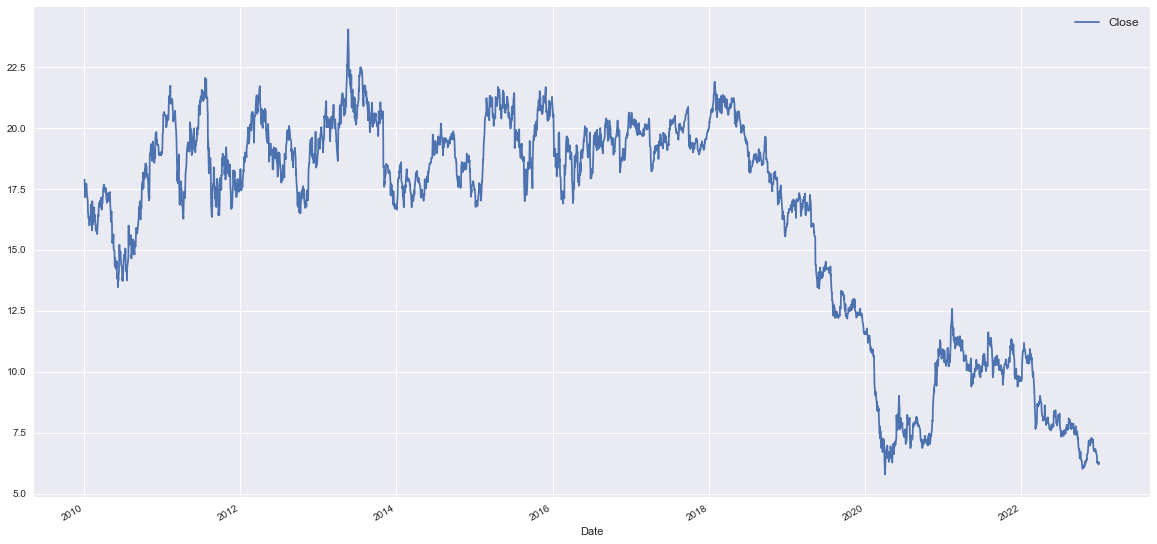

In [27]:
close.plot(figsize=(20,10),fontsize=10)
plt.legend(fontsize=12)
plt.show()

In [34]:
# For multiple symbols(tickers) we first need to re-index the headers to align our data to point on the correct part of the dataframe.
# Then we need to flatten the index into a tuple using the <Name of the dataframe>.columns.to_flat_index() then this 
# pd.MultiIndex.from_tuples(stocks.columns) to let pandas that dataframe is now a tuple to iterate to.
close.iloc[0]

17.889999389648438

In [36]:
close.div(close.iloc[0])

Date
2010-01-04    1.000000
2010-01-05    0.983790
2010-01-06    0.967580
2010-01-07    0.959195
2010-01-08    0.980995
                ...   
2022-12-23    0.349357
2022-12-27    0.347680
2022-12-28    0.346003
2022-12-29    0.351034
2022-12-30    0.351034
Name: Close, Length: 3272, dtype: float64

In [40]:
# This is how we normalize the close. Note this technic is used with multiple stock comparison because of price difference.
normalizeClose = close.div(close.iloc[0]).mul(100)

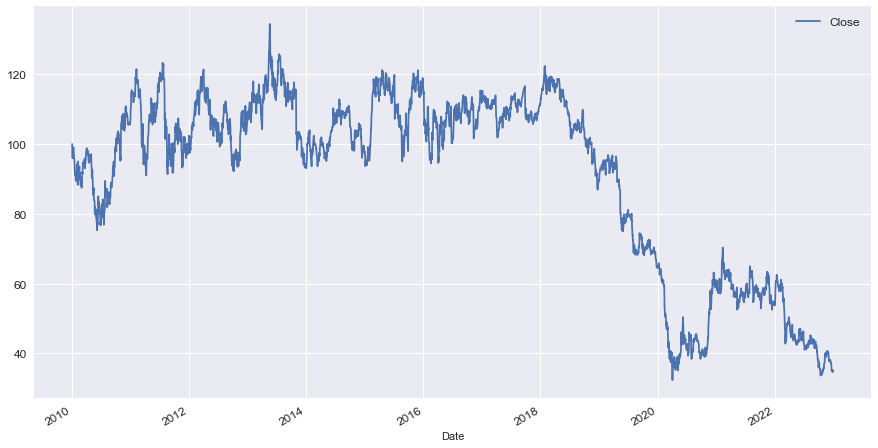

In [41]:
normalizeClose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [58]:
# The to_frame here is to turn the data into a pandas dataframe.
closeAsDF = close.copy().to_frame()
closeAsDF

,Close
Date,
2010-01-04,17.889999
2010-01-05,17.600000
2010-01-06,17.309999
2010-01-07,17.160000
2010-01-08,17.549999
...,...
2022-12-23,6.250000
2022-12-27,6.220000
2022-12-28,6.190000


In [62]:
closeAsDF["lag1"] = closeAsDF.shift(periods=1)

ValueError: Columns must be same length as key

In [71]:
closeAsDF["Diff"] = closeAsDF.Close.sub(closeAsDF.lag1)
closeAsDF

,Close,lag1,Diff
Date,,,
2010-01-04,17.889999,NaN,NaN
2010-01-05,17.600000,17.889999,-0.289999
2010-01-06,17.309999,17.600000,-0.290001
2010-01-07,17.160000,17.309999,-0.150000
2010-01-08,17.549999,17.160000,0.389999
...,...,...,...
2022-12-23,6.250000,6.320000,-0.070000
2022-12-27,6.220000,6.250000,-0.030000
2022-12-28,6.190000,6.220000,-0.030000


In [76]:
# The calculations here is "as is" column against column and we are now getting the percentage change here.  
closeAsDF["Change"] = closeAsDF.Close.div(closeAsDF.lag1).sub(1).mul(100)
closeAsDF

,Close,lag1,Diff,Change
Date,,,,
2010-01-04,17.889999,NaN,NaN,NaN
2010-01-05,17.600000,17.889999,-0.289999,-1.621012
2010-01-06,17.309999,17.600000,-0.290001,-1.647732
2010-01-07,17.160000,17.309999,-0.150000,-0.866549
2010-01-08,17.549999,17.160000,0.389999,2.272724
...,...,...,...,...
2022-12-23,6.250000,6.320000,-0.070000,-1.107598
2022-12-27,6.220000,6.250000,-0.030000,-0.480003
2022-12-28,6.190000,6.220000,-0.030000,-0.482311


In [81]:
# The shortcut for the above
closeAsDF["Diff2"] = closeAsDF.Close.diff(periods=1)
closeAsDF

,Close,lag1,Diff,Change,Diff2
Date,,,,,
2010-01-04,17.889999,NaN,NaN,NaN,NaN
2010-01-05,17.600000,17.889999,-0.289999,-1.621012,-0.289999
2010-01-06,17.309999,17.600000,-0.290001,-1.647732,-0.290001
2010-01-07,17.160000,17.309999,-0.150000,-0.866549,-0.150000
2010-01-08,17.549999,17.160000,0.389999,2.272724,0.389999
...,...,...,...,...,...
2022-12-23,6.250000,6.320000,-0.070000,-1.107598,-0.070000
2022-12-27,6.220000,6.250000,-0.030000,-0.480003,-0.030000
2022-12-28,6.190000,6.220000,-0.030000,-0.482311,-0.030000


In [85]:
# Another shortcut from the above
closeAsDF["Change2"] = closeAsDF.Close.pct_change(periods=1).mul(100)
closeAsDF

,Close,lag1,Diff,Change,Diff2,Change2
Date,,,,,,
2010-01-04,17.889999,NaN,NaN,NaN,NaN,NaN
2010-01-05,17.600000,17.889999,-0.289999,-1.621012,-0.289999,-1.621012
2010-01-06,17.309999,17.600000,-0.290001,-1.647732,-0.290001,-1.647732
2010-01-07,17.160000,17.309999,-0.150000,-0.866549,-0.150000,-0.866549
2010-01-08,17.549999,17.160000,0.389999,2.272724,0.389999,2.272724
...,...,...,...,...,...,...
2022-12-23,6.250000,6.320000,-0.070000,-1.107598,-0.070000,-1.107598
2022-12-27,6.220000,6.250000,-0.030000,-0.480003,-0.030000,-0.480003
2022-12-28,6.190000,6.220000,-0.030000,-0.482311,-0.030000,-0.482311
